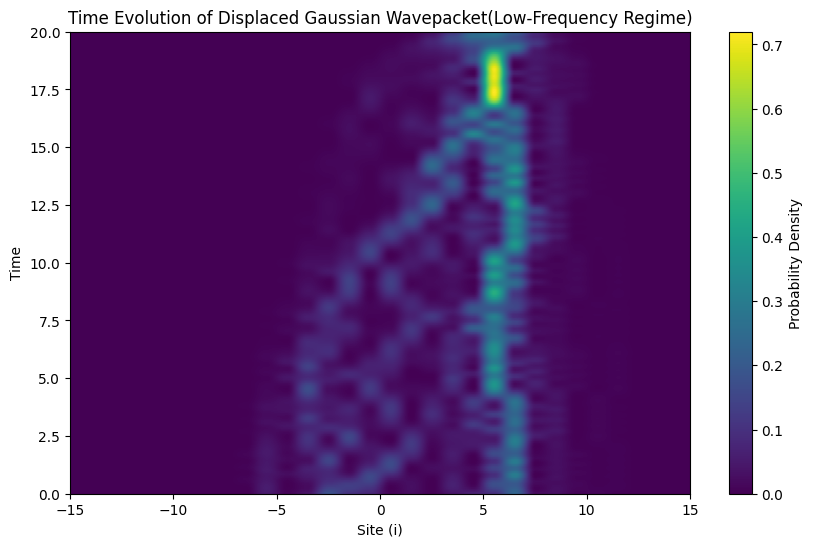

Dominant frequency:  0.30000000000000004
Expected frequency:  0.238732414637843


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.fft import fft, fftfreq

# Parameters
N = 30  # Choose N > 20
V0 = 1.0
omega = 1.5
J = 1
h_bar = 1.0

# Full Hamiltonian
def H_full(t):
    # Hopping term
    hopping_term = -J * (np.roll(np.eye(N), 1, axis=0) + np.roll(np.eye(N), -1, axis=0))

    # Potential term with time-dependent cosine
    potential_term = V0 * np.cos(omega * t) * np.diag(np.arange(-N//2, N//2)**2)

    # Full Hamiltonian
    return hopping_term + potential_term

# Initial Gaussian wavepacket parameters
sigma = 2.0
k0 = 0.0
x = np.arange(-N//2, N//2)
psi0 = np.exp(-(x - k0)**2 / (2 * sigma**2)) / np.sqrt(np.sqrt(np.pi) * sigma)

# Time evolution
def evolve_full(psi, dt, steps):
    result = np.zeros((steps, len(psi)), dtype=complex)
    for t in range(steps):
        H_t = H_full(t * dt)
        U = expm(-1j * H_t * dt / h_bar)
        psi = np.dot(U, psi)
        result[t, :] = psi
    return result

# Displace the wavepacket from the center
displacement = 5
psi0 = np.roll(psi0, displacement)

# Time parameters
dt = 0.1
steps = 200

# Perform time evolution
result_full = evolve_full(psi0, dt, steps)

# Additional part for frequency verification
def verify_frequency(result, dt):
    # Perform Fourier transform
    fft_result = fft(result, axis=0)
    
    # Calculate the frequencies
    frequencies = fftfreq(result.shape[0], dt)
    
    # Identify the dominant frequency
    dominant_frequency = frequencies[np.argmax(np.abs(np.mean(fft_result, axis=1)))]
    
    # So to always have a positive value frequency (we don't care about rotation direction)
    dominant_frequency = np.abs(dominant_frequency)
    
    return dominant_frequency

# Perform time evolution
result = evolve_full(psi0, dt, steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(result)**2, extent=[-N//2, N//2, 0, steps*dt], aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Time Evolution of Displaced Gaussian Wavepacket(Low-Frequency Regime)')
plt.xlabel('Site (i)')
plt.ylabel('Time')
plt.show()

# Verify the oscillation frequency
dominant_frequency = verify_frequency(result, dt)
expected_frequency = omega / (2 * np.pi)

print("Dominant frequency: ", dominant_frequency)
print("Expected frequency: ", expected_frequency)

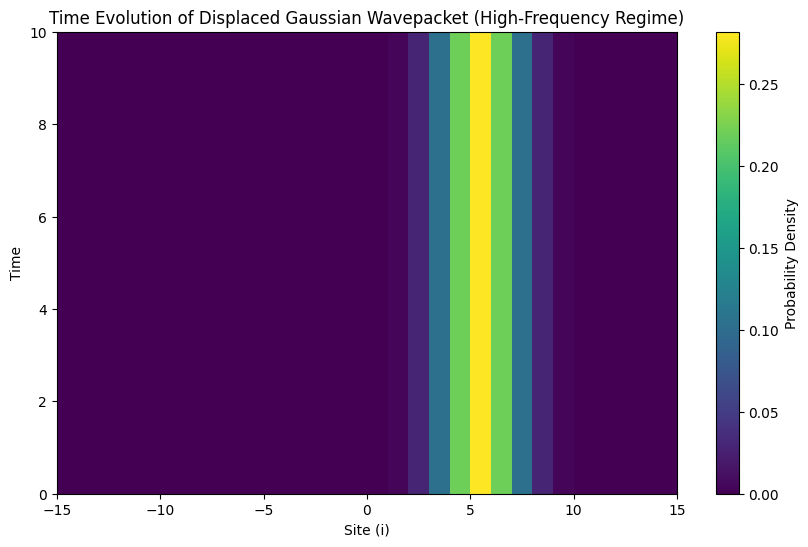

Dominant frequency:  0.4
Expected frequency:  0.238732414637843


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.fft import fft,fftfreq

# Parameters
N = 30  # Choose N > 20
V = 1.0
omega = 1.5
J = 1.0
h_bar = 1.0

# Effective Hamiltonian
def H_eff(i):
    return (-J + (J * V**2) / (4 * omega**2) * (2 * i + 1)**2)

# Initial Gaussian wavepacket parameters
sigma = 2.0
k0 = 0.0
x = np.arange(-N//2, N//2)
psi0 = np.exp(-(x - k0)**2 / (2 * sigma**2)) / np.sqrt(np.sqrt(np.pi) * sigma)

# Time evolution
def evolve(psi, dt, steps):
    result = np.zeros((steps, len(psi)), dtype=complex)
    for t in range(steps):
        U = np.diag(np.exp(-1j * dt * np.array([H_eff(i) for i in range(N)]) / h_bar))
        psi = np.dot(U, psi)
        result[t, :] = psi
    return result

# Displace the wavepacket from the center
displacement = 5
psi0 = np.roll(psi0, displacement)

# Time parameters
dt = 0.1
steps = 100

# Additional part for frequency verification
def verify_frequency(result, dt):
    # Perform Fourier transform
    fft_result = fft(result, axis=0)
    
    # Calculate the frequencies
    frequencies = fftfreq(result.shape[0], dt)
    
    # Identify the dominant frequency
    dominant_frequency = frequencies[np.argmax(np.abs(np.mean(fft_result, axis=1)))]
    
    # So to always have a positive value frequency (we don't care about rotation direction)
    dominant_frequency = np.abs(dominant_frequency)
    
    return dominant_frequency

# Perform time evolution
result = evolve(psi0, dt, steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(result)**2, extent=[-N//2, N//2, 0, steps*dt], aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Time Evolution of Displaced Gaussian Wavepacket (High-Frequency Regime)')
plt.xlabel('Site (i)')
plt.ylabel('Time')
plt.show()

# Verify the oscillation frequency
dominant_frequency = verify_frequency(result, dt)
expected_frequency = omega / (2 * np.pi)

print("Dominant frequency: ", dominant_frequency)
print("Expected frequency: ", expected_frequency)